In [0]:
from keras.datasets import cifar10

import numpy as np
import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization

random_state = 42

Using TensorFlow backend.


In [0]:
(cifar_X_1, cifar_y_1), (cifar_X_2, cifar_y_2) = cifar10.load_data()

cifar_X = np.r_[cifar_X_1, cifar_X_2]
cifar_y = np.r_[cifar_y_1, cifar_y_2]

cifar_X = cifar_X.astype('float32') / 255
cifar_y = np.eye(10)[cifar_y.astype('int32').flatten()]

train_X, test_X, train_y, test_y = train_test_split(
    cifar_X, cifar_y, test_size=10000, random_state=random_state)
train_X, valid_X, train_y, valid_y = train_test_split(
    train_X, train_y, test_size=10000, random_state=random_state)

170500096/170498071 [==============================] - 45s 0us/step


In [0]:
cifar_X_1.shape

(50000, 32, 32, 3)

In [0]:
# データ拡張
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# datagen = ImageDataGenerator(
#            rotation_range=0,
#            width_shift_range=0,
#            height_shift_range=0,
#            shear_range=0,
#            zoom_range=0,
#            horizontal_flip=False,
#            vertical_flip=False)

# データ拡張
datagen = ImageDataGenerator(zca_whitening=True)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:334: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [0]:
# ミニバッチを生成するジェネレーターを作成する。
gen = datagen.flow(x, batch_size=16)

ValueError: ignored

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, Input, Lambda
from keras.callbacks import EarlyStopping

In [0]:
model = Sequential()

In [0]:
model = Sequential()

# 32x32x3 -> 30x30x64
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 28x28x64 -> 14x14x64
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))  # 14x14x64 -> 12x12x128
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 12x12x128 -> 5x5x128
model.add(Dropout(0.5))

model.add(Flatten())  # 5x5x16 -> 400
model.add(Dense(120, activation='relu',
                kernel_initializer='he_normal'))  # 400 ->120
# 120 ->84
model.add(Dense(84, activation='relu', kernel_initializer='he_normal'))  
model.add(Dense(10, activation='softmax'))  # 84 ->10

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# VGG19

num_classes = 2
img_height, img_width = 32, 32
inputs = Input(shape=(img_height, img_width, 3))

inputs = Input((img_height, img_width, 3))
x = Conv2D(64, (3, 3), padding='same', strides=1, activation='relu', name='conv1_1')(inputs)
x = Conv2D(64, (3, 3), padding='same', strides=1, activation='relu', name='conv1_2')(x)
x = MaxPooling2D((2, 2), strides=2,  padding='same')(x)
x = Conv2D(128, (3, 3), padding='same', strides=1, activation='relu', name='conv2_1')(x)
x = Conv2D(128, (3, 3), padding='same', strides=1, activation='relu', name='conv2_2')(x)
x = MaxPooling2D((2, 2), strides=2,  padding='same')(x)
x = Conv2D(256, (3, 3), padding='same', strides=1, activation='relu', name='conv3_1')(x)
x = Conv2D(256, (3, 3), padding='same', strides=1, activation='relu', name='conv3_2')(x)
x = Conv2D(256, (3, 3), padding='same', strides=1, activation='relu', name='conv3_3')(x)
x = Conv2D(256, (3, 3), padding='same', strides=1, activation='relu', name='conv3_4')(x)
x = MaxPooling2D((2, 2), strides=2,  padding='same')(x)
x = Conv2D(512, (3, 3), padding='same', strides=1, activation='relu', name='conv4_1')(x)
x = Conv2D(512, (3, 3), padding='same', strides=1, activation='relu', name='conv4_2')(x)
x = Conv2D(512, (3, 3), padding='same', strides=1, activation='relu', name='conv4_3')(x)
x = Conv2D(512, (3, 3), padding='same', strides=1, activation='relu', name='conv4_4')(x)
x = MaxPooling2D((2, 2), strides=2,  padding='same')(x)
x = Conv2D(512, (3, 3), padding='same', strides=1, activation='relu', name='conv5_1')(x)
x = Conv2D(512, (3, 3), padding='same', strides=1, activation='relu', name='conv5_2')(x)
x = Conv2D(512, (3, 3), padding='same', strides=1, activation='relu', name='conv5_3')(x)
x = Conv2D(512, (3, 3), padding='same', strides=1, activation='relu', name='conv5_4')(x)
x = MaxPooling2D((2, 2), strides=2,  padding='same')(x)
x = Flatten()(x)
x = Dense(4096, name='dense1', activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(4096, name='dense2', activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

In [0]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    #optimizer='adam',
    optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
    metrics=['accuracy']
)

In [0]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x=train_X, y=train_y, batch_size=256, epochs=10, verbose=1,
          validation_data=(test_X, test_y), callbacks=[early_stopping])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 11s 274us/step - loss: 0.6904 - acc: 0.7552 - val_loss: 0.6814 - val_acc: 0.7655
Epoch 2/10
40000/40000 [==============================] - 10s 255us/step - loss: 0.6785 - acc: 0.7616 - val_loss: 0.7466 - val_acc: 0.7445
Epoch 00002: early stopping


In [0]:
score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8019922550201416
Test accuracy: 0.7185


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
__________

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = model.predict(test_X, verbose=1)

print(confusion_matrix(np.argmax(test_y, 1), np.argmax(y_pred, 1)))
print(classification_report(np.argmax(test_y, 1), np.argmax(y_pred, 1)))

10000/10000 [==============================] - 2s 199us/step
[[767  14  28  12  27   1   3   6  31 104]
 [ 11 767   3   6   3   1   6   1   5 176]
 [ 61   5 585  45 167  42  55  23   9  16]
 [ 28   6  55 588 121 131  60  29  10  38]
 [ 12   1  22  29 820  12  20  49   4   8]
 [  8   5  34 180  99 595  13  54   5  15]
 [ 10   5  30  48  60   9 770   4   4  10]
 [  7   3  30  35  74  29   0 827   4  16]
 [ 85  24   9   5   9   3   2   4 786  68]
 [ 15  16   3   3   8   1   3   4   6 940]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       993
           1       0.91      0.78      0.84       979
           2       0.73      0.58      0.65      1008
           3       0.62      0.55      0.58      1066
           4       0.59      0.84      0.69       977
           5       0.72      0.59      0.65      1008
           6       0.83      0.81      0.82       950
           7       0.83      0.81      0.82      1025
           8       0.

In [0]:
model.save_weights('cifar10-cnn-weights.h5')

In [0]:
from google.colab import files
files.download('cifar10-cnn-weights.h5')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving cifar10-cnn-weights-2.h5 to cifar10-cnn-weights-2.h5


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
labels = ["airplane", "automobile", "bird", "cat", "deer"
          , "dog", "forg", "horse", "ship", "truck"]

# モデルデータの読み込み
model.load_weights('cifar10-cnn-weights-2.h5')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test-plane.jpg to test-plane.jpg


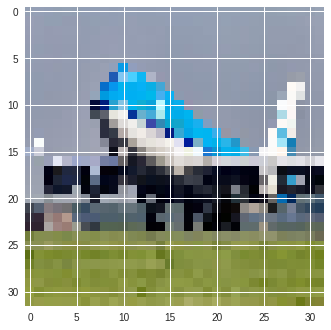

1/1 [==============================] - 0s 105ms/step
airplane = 100.0
automobile = 0.0
bird = 0.0
cat = 0.0
deer = 0.0
dog = 0.0
forg = 0.0
horse = 0.0
ship = 0.0
truck = 0.0
---
予測した結果= airplane


In [0]:
# OpenCVを使って画像を読み込む
im = cv2.imread('test-plane.jpg')

# 色空間を変換してリサイズ
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im)
plt.show()

# 予測する
r = model.predict(np.array([im]), batch_size=32, verbose=1)
res = r[0]

# 結果を表示する
for i, acc in enumerate(res):
  print(labels[i], "=", float(acc * 100))
print("---")  
print("予測した結果=", labels[res.argmax()])

In [0]:
model.save('cifar10-cnn-model.h5')

from google.colab import files
files.download('cifar10-cnn-model.h5')

In [0]:
from keras.datasets import cifar10

import numpy as np
import keras

from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization

random_state = 42

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
# 写真データの読み込み
photos = np.load('photos.npz')

photo_x = photos['x']
photo_y = photos['y']

In [0]:
photo_X = photo_x.astype('float32') / 255
photo_y = np.eye(10)[photo_y.astype('int32').flatten()]

train_X, test_X, train_y, test_y = train_test_split(
    photo_X, photo_y, test_size=20, random_state=random_state)
train_X, valid_X, train_y, valid_y = train_test_split(
    train_X, train_y, test_size=20, random_state=random_state)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping

In [0]:
model = Sequential()

# 32x32x3 -> 30x30x64
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 28x28x64 -> 14x14x64
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))  # 14x14x64 -> 12x12x128
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 12x12x128 -> 5x5x128
model.add(Dropout(0.5))

model.add(Flatten())  # 5x5x16 -> 400
model.add(Dense(120, activation='relu',
                kernel_initializer='he_normal'))  # 400 ->120
# 120 ->84
model.add(Dense(84, activation='relu', kernel_initializer='he_normal'))  
model.add(Dense(10, activation='softmax'))  # 84 ->10

In [0]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [0]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x=train_X, y=train_y, batch_size=128, epochs=10, verbose=1,
          validation_data=(test_X, test_y), callbacks=[early_stopping])

Train on 160 samples, validate on 20 samples
Epoch 1/10
160/160 [==============================] - 1s 4ms/step - loss: 2.3565 - acc: 0.2188 - val_loss: 1.2211 - val_acc: 0.5000
Epoch 2/10
160/160 [==============================] - 0s 525us/step - loss: 0.9197 - acc: 0.5500 - val_loss: 0.6961 - val_acc: 0.5000
Epoch 3/10
160/160 [==============================] - 0s 494us/step - loss: 0.8181 - acc: 0.5812 - val_loss: 0.6391 - val_acc: 0.5500
Epoch 4/10
160/160 [==============================] - 0s 488us/step - loss: 0.6343 - acc: 0.6562 - val_loss: 0.6249 - val_acc: 0.5000
Epoch 5/10
160/160 [==============================] - 0s 473us/step - loss: 0.8001 - acc: 0.6063 - val_loss: 0.5906 - val_acc: 0.6500
Epoch 6/10
160/160 [==============================] - 0s 457us/step - loss: 0.6114 - acc: 0.6750 - val_loss: 0.4328 - val_acc: 0.9500
Epoch 7/10
160/160 [==============================] - 0s 436us/step - loss: 0.3736 - acc: 0.8563 - val_loss: 0.4811 - val_acc: 0.8000
Epoch 00007: early 

In [0]:
score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4810658097267151
Test accuracy: 0.800000011920929


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
labels = ["sushi", "curry", "pizza"]

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test-sushi.jpg to test-sushi (2).jpg


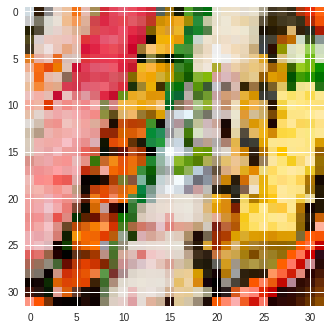

1/1 [==============================] - 0s 8ms/step
画像:sushi 確率:100%


In [0]:
# OpenCVを使って画像を読み込む
im = cv2.imread('test-sushi.jpg')

# 色空間を変換してリサイズ
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im)
plt.show()

# 予測する
r = model.predict(np.array([im]), batch_size=32, verbose=1)
res = r[0]

# 結果を表示する
predicted = labels[res.argmax()]
percentage = int(res[res.argmax()] * 100)
print("画像:" + predicted + " 確率:" + str(percentage) + '%')

# CIFAR-10 精度改善

In [0]:
from keras.datasets import cifar10

import numpy as np
import keras

from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization

random_state = 42

Using TensorFlow backend.


In [0]:
(cifar_X_1, cifar_y_1), (cifar_X_2, cifar_y_2) = cifar10.load_data()

cifar_X = np.r_[cifar_X_1, cifar_X_2]
cifar_y = np.r_[cifar_y_1, cifar_y_2]

cifar_X = cifar_X.astype('float32') / 255
cifar_y = np.eye(10)[cifar_y.astype('int32').flatten()]

train_X, test_X, train_y, test_y = train_test_split(
    cifar_X, cifar_y, test_size=10000, random_state=random_state)
train_X, valid_X, train_y, valid_y = train_test_split(
    train_X, train_y, test_size=10000, random_state=random_state)

170500096/170498071 [==============================] - 25s 0us/step


In [0]:
cifar_X_1.shape

(50000, 32, 32, 3)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    width_shift_range=0.2,   # 3.1.1 左右にずらす
    height_shift_range=0.2,  # 3.1.2 上下にずらす
    horizontal_flip=True,    # 3.1.3 左右反転
    samplewise_center=False,
    samplewise_std_normalization=False,
    zca_whitening=False)

In [0]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))  # 32x32x3 -> 28x28x6
model.add(MaxPooling2D(pool_size=(2, 2)))  # 28x28x6 -> 14x14x6
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal'))  # 14x14x6 -> 10x10x16
model.add(MaxPooling2D(pool_size=(2, 2)))  # 10x10x16 -> 5x5x16

model.add(Flatten())  # 5x5x16 -> 400
model.add(Dense(120, activation='relu',
                kernel_initializer='he_normal'))  # 400 ->120
model.add(Dense(84, activation='relu', kernel_initializer='he_normal'))  # 120 ->84
model.add(Dense(10, activation='softmax'))  # 84 ->10

In [0]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')
weights = [com.get_weights() for com in model.layers[1:]]
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))) # 32x32x3 -> 30x30x64
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 30x30x64 -> 28x28x64
model.add(MaxPooling2D(pool_size=(2, 2))) # 28x28x64 -> 14x14x64

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # 14x14x64 -> 12x12x128
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # 12x12x128 -> 10x10x128
model.add(MaxPooling2D(pool_size=(2, 2))) # 10x10x128 -> 5x5x128

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

553467904/553467096 [==============================] - 13s 0us/step


In [0]:
# weightの初期化
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[3].set_weights(weights[3])
model.layers[4].set_weights(weights[4])

In [0]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [0]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x=train_X, y=train_y, batch_size=128, epochs=10, verbose=1,
          validation_data=(valid_X, valid_y), callbacks=[early_stopping])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 13s 320us/step - loss: 2.4116 - acc: 0.3727 - val_loss: 1.3434 - val_acc: 0.5218
Epoch 2/10
40000/40000 [==============================] - 12s 300us/step - loss: 1.2238 - acc: 0.5692 - val_loss: 1.1420 - val_acc: 0.5949
Epoch 3/10
40000/40000 [==============================] - 12s 300us/step - loss: 1.0422 - acc: 0.6365 - val_loss: 0.9613 - val_acc: 0.6726
Epoch 4/10
40000/40000 [==============================] - 12s 300us/step - loss: 0.9115 - acc: 0.6857 - val_loss: 0.9247 - val_acc: 0.6804
Epoch 5/10
40000/40000 [==============================] - 12s 300us/step - loss: 0.8115 - acc: 0.7195 - val_loss: 0.8615 - val_acc: 0.7018
Epoch 6/10
40000/40000 [==============================] - 12s 300us/step - loss: 0.7444 - acc: 0.7424 - val_loss: 0.8919 - val_acc: 0.7023
Epoch 00006: early stopping


In [0]:
model.fit_generator(datagen.flow(train_X, train_y, batch_size=100),
                    steps_per_epoch=train_X.shape[0] // 100, epochs=5, validation_data=(valid_X, valid_y))

RuntimeError: ignored

In [0]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit_generator(datagen.flow(train_X, train_y, batch_size=100),
                    steps_per_epoch=train_X.shape[0] // 100, epochs=10, validation_data=(valid_X, valid_y))

RuntimeError: ignored

In [0]:
score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

RuntimeError: ignored